In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#train_path = "landing_targets/training_set"
train_path = "landing_targets/training_set"
valid_path = "landing_targets/validation_set"
test_path = "landing_targets/test_set"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['target','not_target'],batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['target', 'not_target'], batch_size = 10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes = ['target', 'not_target'],batch_size = 10 )

Found 516 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
Found 66 images belonging to 2 classes.


In [4]:
def plots(ims, figsize = (12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize = figsize)
        cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize = 16)
            plt.imshow(ims[i], interpolation = None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

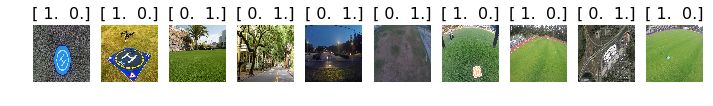

In [6]:
plots(imgs,titles = labels)

In [7]:
vgg16_model = keras.applications.vgg16.VGG16()

In [8]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
#model.layers.pop()

In [12]:
#model.summary()

In [13]:
for layer in model.layers:
    layer.trainable = False

In [14]:
model.add(Dense(2,activation = "softmax"))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
model.compile(Adam(lr = .0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit_generator(train_batches, steps_per_epoch = 50, 
                   validation_data = valid_batches, validation_steps = 19, epochs = 15, verbose = 2)

Epoch 1/15
 - 575s - loss: 0.6344 - acc: 0.7373 - val_loss: 0.4913 - val_acc: 0.8105
Epoch 2/15
 - 584s - loss: 0.3876 - acc: 0.8374 - val_loss: 0.4192 - val_acc: 0.8368
Epoch 3/15
 - 618s - loss: 0.3867 - acc: 0.8480 - val_loss: 0.4056 - val_acc: 0.8316
Epoch 4/15
 - 572s - loss: 0.2679 - acc: 0.8787 - val_loss: 0.4130 - val_acc: 0.8526
Epoch 5/15
 - 567s - loss: 0.2519 - acc: 0.8940 - val_loss: 0.3567 - val_acc: 0.8579
Epoch 6/15
 - 708s - loss: 0.2143 - acc: 0.9080 - val_loss: 0.3624 - val_acc: 0.8474
Epoch 7/15
 - 648s - loss: 0.1974 - acc: 0.9114 - val_loss: 0.3446 - val_acc: 0.8737
Epoch 8/15
 - 790s - loss: 0.1857 - acc: 0.9300 - val_loss: 0.3426 - val_acc: 0.8632
Epoch 9/15
 - 692s - loss: 0.1563 - acc: 0.9387 - val_loss: 0.3284 - val_acc: 0.8684
Epoch 10/15


StopIteration: [Errno 2] No such file or directory: 'landing_targets/training_set/not_target/scene02458.png'

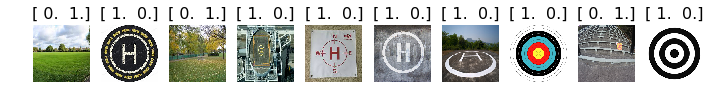

In [18]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [19]:
test_labels = test_labels[:,1]
test_labels

array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.], dtype=float32)

In [20]:
prediction = model.predict_generator(test_batches, steps = 1, verbose = 0)

In [21]:
cm = confusion_matrix(test_labels, np.round(prediction[:,1]))

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[6 1]
 [0 3]]


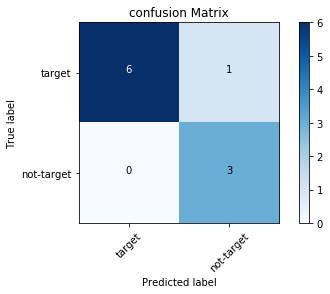

In [23]:
cm_plot_labels = ['target', 'not-target']
plot_confusion_matrix(cm, cm_plot_labels, title = "confusion Matrix")

In [24]:
model.save("target_detection3.h5")